Student's t-distribution
* Is a normally shaped distribution, except that it has heavier tails.
* Distributions of sample means are typically shaped like a t-distribution.

Degrees of freedom
* A parameter that allows the t-distribution to adjust to the sample size.
* A 90% confidence interval around the sample mean is given by:
* $
\bar{x} \pm t_{n-1}(0.05) \cdot \frac{s}{\sqrt{n}}
 $
* Where $t_{n-1}$ is the t-value for the given confidence level and degrees of freedom.
* Chops off the tails of the distribution at either end to give a more accurate confidence interval.

Binomial Distribution
* Use of the term success does not imply that the outcome is positive or desirable but rather that it is the outcome of interest.

Trial
* A event with a discrete outcome

Success
* The outcome of interest

Binomial
* having two possible outcomes

Binomial trial
* A trial with two possible outcomes

A binomial distribution
* A distribution of number of successes in a fixed number of trials.
* Bernoulli distribution is a special case of the binomial distribution.
* The binomial distribution is the frequency distribution of the number of successes (x) in a given number of trials (n) with a specified probability (p) of success in each trial.

* If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?

In [100]:
import scipy.stats as stats
import scipy
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# x = 0, n = 200, p = 0.02
stats.binom.pmf(0, n=200, p=0.02)

np.float64(0.017587946605721567)

* What is the probability of observing 2 sales in 5 clicks for a conversion rate of 0.1?

In [102]:
stats.binom.cdf(2, n=5, p=0.1)

np.float64(0.99144)

The mean of a binomial distribution is given by:
* $ \mu = n \times p $
* As the expected number of successes in n trials, for a success probability of p.

The variance of a binomial distribution is given by:
* $ n \times p(1 - p) $
* With a large enough number of trials when p is close to 0.5, the binomial distribution is approximately normal.

Chi-Square Distribution
* Expectation defines as nothing unusual or of note in the data (correlation between variables or predictable patterns)
* This is termed as the null hypothesis.

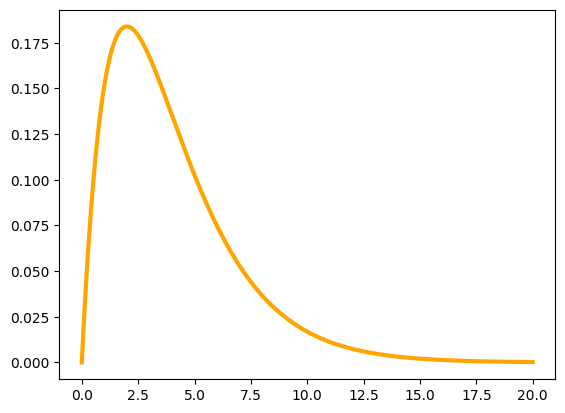

In [103]:
x = np.arange(0, 20, 0.001)
plt.plot(x, chi2.pdf(x, df=4), color='orange', linewidth=3)

Chi-Square distributions with different degrees of freedom

Text(0.5, 1.0, 'Chi-Square Distributions')

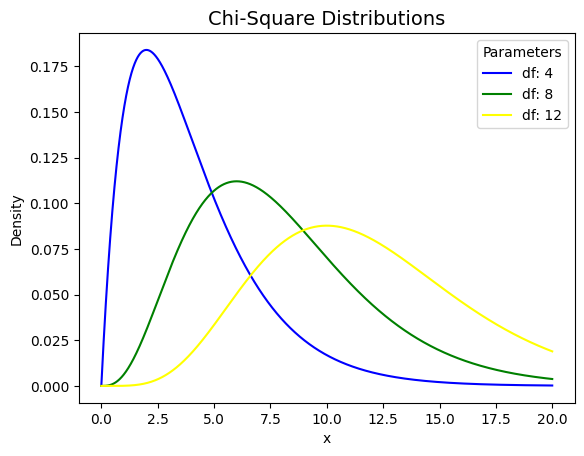

In [104]:
plt.plot(x, chi2.pdf(x, df=4), label='df: 4', color = 'blue')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8', color = 'green')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12', color='yellow')
plt.legend(title="Parameters")
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Chi-Square Distributions', fontsize=14)

Null hypothesis
* Test whether one variable is independent of another.
* The statistics that measures the extent to which results depart from the null expectation of independence is the chi-square statistic. Defined by the difference between the observed and expected values, divided by the expected values, squared, then summed across all categories.
* Is a measure of extent to which a set of observed values "fits" a specified distribution
* Useful determining whether multiple treatments differ from one another in their effects.
* Is the distribution of this statistic under repeated resampling from the data draws from the null hypothesis.
* A low chi-square statistic indicates that the null hypothesis is likely true.
* A high chi-square statistic indicates that the null hypothesis is likely false.

F-Distribution
* A common procedure to test multiple treatments across groups, similarly to the A/B/C test, except that deals with measured continuous variables rather than counts.
* F-Distribution is interested in the ratio of variances among group means are greater than expected by chance, also the variability within each group called the Anova
* Otherwise, this would be produced by random sampling which all the group means are equal(null model).
* Also used in linear regression to compare the variation accounted for by the regression model to overall variation in the data.

* These distributions are used to fit models to data and performing accurate analyses.

F-Test

* To test whether two populations variances are equal, the null and alternative hypotheses are:
* Null hypothesis: The two variances populations are equal.
$ \mathbf{H_0}: \sigma_1^2 = \sigma_2^2 $
* Alternative hypothesis: The two populations variances are not equal.
$ \mathbf{H_1}: \sigma_1^2 \neq \sigma_2^2 $
* The F-test tries to answer whether the two samples comes with equal variances and if some new treatment reduces the variability.

In [105]:
x = [18, 19, 22, 25, 27, 28, 41, 45, 51, 55]
y = [14, 15, 15, 17, 18, 22, 25, 25, 27, 34]

In [106]:
def f_test(x, y):
    var_x = np.array(x)
    var_y = np.array(y)

    f = np.var(var_x, ddof=1) / np.var(var_y, ddof=1)

    dfn = len(var_x) - 1
    dfd = len(var_y) - 1

    p = 1 - scipy.stats.f.cdf(f, dfn, dfd)
    return f, p

In [107]:
f_test(x, y)

(np.float64(4.387122002085505), np.float64(0.01912653593238578))

In this case the p-value is less than .05, so we reject the null hypothesis.

Poisson Distributions

Lambda
* The rate (per unit of time or space) at which events occur

Poisson distribution
* The frequency distribution of the number of events in sampled units of time or space
* estimate the average number of events per unit of time or space or how different from one unit of time to another

* tries to answer questions like "How much capacity do we need to be 95% sure of fully processing the internet traffic that arrive on a server in any five second period?"

In [108]:
poisson = stats.poisson.rvs(2, size=100)

* generating 100 number from a poisson distribution with lambda=2, if incoming customer service calls average two per minute, this will simulate 100 minutes, returning the number of calls

Exponential distribution
* The frequency distribution of the time or distance from one event to the next one

In [109]:
exponential = stats.expon.rvs(0.2, size=100)

Weibull distribution
* A generalized version of the exponential distribution in which the event rate is allowed to shift over time

Shape parameter that allows the event rate to change by $ \beta $
If $ \beta > 1 $ The probability of an event increases over time
If $ \beta < 1 $ The probability decreases over time

The second parameter is used with time to failure, the symbol used is $\eta$ Which is called the scale parameter.

Generating 100 random numbers (lifetimes) from a weibull distribution with shape of 1.5 which represents beta, and characteristics life of 5,000, which represents eta.

In [110]:
weibull = stats.weibull_min.rvs(1.5, scale=5000, size=100)

* For events that occur at a constant rate, the number of events per unit of time or space can be modeled as Poisson.

* Modelling the time an distance between one event and the next as exponential

* A changing event rate over time ( increasing probability of device failure) can be modeled as Weibull.